In [22]:
import pandas as pd
import numpy as np

In [23]:
df = pd.read_csv("train_data.csv")
# if dataset has nan values then fill it with mean of that column
df = df.fillna(df.mean())

In [24]:
df.head(5)

,open,high,low,close,return,volatility,volume,prev volume,next month return sign
0,1,1.025595,1.000000,1.018723,0.036807,0.086790,4398500,4009100.0,1
1,1,1.066588,1.000000,1.066572,0.076164,0.141086,12077600,13004600.0,0
2,1,1.044670,0.972615,0.972615,-0.024128,0.162615,13119900,12077600.0,1
3,1,1.089809,1.000000,1.089809,0.094817,0.145533,3840600,4485900.0,0
4,1,1.032791,0.970420,0.995200,0.012631,0.199212,9886800,14313900.0,0


In [25]:
# make a column diff_high_low which is the difference between high and low
df['diff_high_low'] = df['high'] - df['low']
df['diff_open_close'] = df['open'] - df['close']
df['ratio_currvol_prevvol']=df['volume']/df['prev volume']
# drop columns high , low , open , close , volume , prev volume
df.drop(['high','low','open','close','volume','prev volume'],axis=1,inplace=True)
df.head(5)

,return,volatility,next month return sign,diff_high_low,diff_open_close,ratio_currvol_prevvol
0,0.036807,0.086790,1,0.025595,-0.018723,1.097129
1,0.076164,0.141086,0,0.066588,-0.066572,0.928718
2,-0.024128,0.162615,1,0.072055,0.027385,1.086300
3,0.094817,0.145533,0,0.089809,-0.089809,0.856149
4,0.012631,0.199212,0,0.062371,0.004800,0.690713


In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['diff_high_low','diff_open_close','ratio_currvol_prevvol']] = scaler.fit_transform(df[['diff_high_low','diff_open_close','ratio_currvol_prevvol']])
df[['return','volatility']] = scaler.fit_transform(df[['return','volatility']])
import seaborn as sns

<AxesSubplot:>

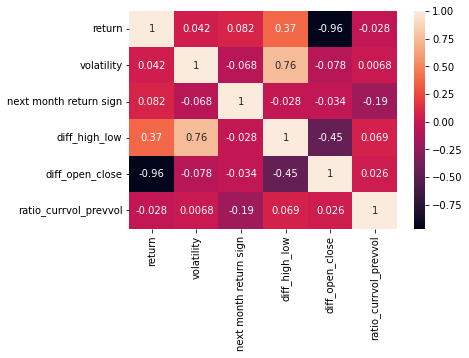

In [27]:
sns.heatmap(df.corr(), annot=True)

In [28]:
X=df.drop(['next month return sign'],axis=1)
y=df['next month return sign']

X = scaler.fit_transform(X)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
print(X_test)

[[0.5595994  0.20820026 0.11070997 0.61483881 0.30394027]
 [0.48607515 0.0763214  0.03803584 0.67248919 0.5355056 ]
 [0.29965599 0.13555471 0.05393179 0.73046124 0.55043625]
 [0.37111221 0.34514804 0.22463416 0.76243754 0.1620286 ]
 [0.64417492 0.1146823  0.23814518 0.49540162 0.35634067]
 [0.1749732  0.42168161 0.29072173 0.85263459 0.55751821]
 [0.23578523 0.15465254 0.11545224 0.79896693 0.30491744]
 [0.13969378 0.21158333 0.1314834  0.87009817 0.44608112]
 [0.4550036  0.15526522 0.16564689 0.56716509 0.21517302]
 [0.51891192 0.2602146  0.29517682 0.59272208 0.39715861]
 [0.71280438 0.1632094  0.36111966 0.40272377 0.43978237]
 [0.65962681 0.22859763 0.33163943 0.50820053 0.32912026]
 [0.06469699 0.13677765 0.16685717 0.93904218 0.        ]
 [0.14239506 0.18498499 0.22520151 0.86618532 0.59979343]
 [0.38305498 0.24677528 0.19330523 0.67628838 0.20344141]
 [0.47226231 0.08895501 0.0929815  0.61785774 0.95113505]
 [0.68090672 0.24579273 0.44971617 0.4384223  1.        ]
 [0.62679606 0

In [32]:
predictions = logmodel.predict(X_test)

In [33]:
from sklearn.metrics import classification_report , accuracy_score
print(classification_report(y_test,predictions))
print('Accuracy ',accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

           0       0.35      0.89      0.50         9
           1       0.00      0.00      0.00        15

    accuracy                           0.33        24
   macro avg       0.17      0.44      0.25        24
weighted avg       0.13      0.33      0.19        24

Accuracy  0.3333333333333333


In [34]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions))

[[ 8  1]
 [15  0]]


In [35]:
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [36]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [37]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [38]:
print(X_test)
y_pred = rf.predict(X_test)

[[0.07838445 0.20823405 0.2105227  0.92597804 0.41185284]
 [0.37111221 0.34514804 0.22463416 0.76243754 0.1620286 ]
 [0.47853134 0.20904206 0.09649222 0.65163037 0.46541547]
 [0.38762732 0.30051171 0.25337346 0.67949312 0.74641816]
 [0.07892382 0.42643285 0.35908176 0.96003991 0.78141543]
 [0.67322643 0.20615511 0.24602662 0.48952028 0.38074335]
 [0.37923722 0.06669087 0.04457376 0.71668186 0.08442631]
 [0.47226231 0.08895501 0.0929815  0.61785774 0.95113505]
 [0.32079295 0.16770381 0.12786904 0.7481943  0.50415928]
 [1.         1.         1.         0.         0.07670467]
 [0.30532363 0.18955154 0.18480733 0.76892114 0.38597324]
 [0.         0.46812013 0.38140463 1.         0.69580961]
 [0.13813626 0.22019282 0.29375167 0.92433923 0.29350884]
 [0.36229278 0.30946107 0.1139363  0.75262531 0.56487319]
 [0.65962681 0.22859763 0.33163943 0.50820053 0.32912026]
 [0.71280438 0.1632094  0.36111966 0.40272377 0.43978237]
 [0.26177182 0.         0.00517496 0.78194073 0.24719405]
 [0.27875332 0

In [39]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7142857142857143


In [40]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[9 2]
 [4 6]]


In [41]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()

In [42]:
# read test file
test_df = pd.read_csv("test_data.csv")
# if dataset has nan values then fill it with mean of that column
test_df = test_df.fillna(test_df.mean())

test_df.head(5)
# make same transformations on test data
test_df['diff_high_low'] = test_df['high'] - test_df['low']
test_df['diff_open_close'] = test_df['open'] - test_df['close']
test_df['ratio_currvol_prevvol']=test_df['volume']/test_df['prev volume']
# drop columns high , low , open , close , volume , prev volume
test_df.drop(['high','low','open','close','volume','prev volume'],axis=1,inplace=True)
test_df.head(5)
# make same transformations on test data
test_df[['diff_high_low','diff_open_close','ratio_currvol_prevvol']] = scaler.fit_transform(test_df[['diff_high_low','diff_open_close','ratio_currvol_prevvol']])

test_df[['return','volatility']] = scaler.fit_transform(test_df[['return','volatility']])
test_df.head(5)
# make predictions on test data
test_predictions = rf.predict(test_df)
# save predictions in a csv file
final_predictions = pd.DataFrame(test_predictions)
final_predictions.to_csv("predictions.csv",index=False)
print(test_df)

      return  volatility  diff_high_low  diff_open_close  \
0   0.659150    0.023378       0.074140         0.317206   
1   0.555441    0.143284       0.151410         0.351834   
2   0.881256    0.148411       0.263961         0.095546   
3   0.692767    0.169293       0.114064         0.187983   
4   0.674503    0.120790       0.047633         0.243509   
5   0.666476    0.012099       0.042814         0.323295   
6   0.800408    0.097268       0.095510         0.191885   
7   0.942095    0.009554       0.191234         0.000000   
8   0.740635    0.039599       0.078907         0.209179   
9   0.705117    0.008450       0.000000         0.239076   
10  0.694258    0.039765       0.019148         0.268350   
11  0.000000    1.000000       1.000000         1.000000   
12  0.702276    0.061895       0.044760         0.281961   
13  0.755936    0.076857       0.055723         0.225543   
14  0.793116    0.012655       0.039112         0.173158   
15  0.724570    0.006855       0.050515 